In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import cv2
from sklearn.utils import shuffle


folder_path_circle = "/Users/coldbrew/Documents/SKT_FLY/2주차/data/shapes/circles"
folder_path_square = "/Users/coldbrew/Documents/SKT_FLY/2주차/data/shapes/squares"
folder_path_triangle = "/Users/coldbrew/Documents/SKT_FLY/2주차/data/shapes/triangles"

def load_images_with_label(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".png")):
            file_path = os.path.join(folder_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # (이미지, 레이블) 쌍으로 추가
                img_resized = cv2.resize(img, (28,28))
                # img_flat = img_resized.flatten() 
                data.append((img_resized, label))
    return data

# 각각의 폴더에서 이미지 불러오기
circle_data = load_images_with_label(folder_path_circle, 0)
square_data = load_images_with_label(folder_path_square, 1)
triangle_data = load_images_with_label(folder_path_triangle, 2)

# 전체 데이터셋 합치기
dataset = circle_data + square_data + triangle_data


print("데이터셋 크기:", len(dataset))
print("예시 (첫 번째 샘플):", dataset[0])

데이터셋 크기: 300
예시 (첫 번째 샘플): (array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 252, 191, 124, 134, 159, 212, 250, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 222,  77,  55, 112, 157, 130,  73, 187, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        242, 151,  55, 170, 253, 255, 255, 255, 179, 123, 243, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 235,
        130, 120, 230, 255, 255, 255, 255, 255, 236,  99, 218, 255, 255,
 

In [3]:
dataset[0][0].shape

(28, 28)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = [d[0] for d in dataset]  # (area, perimeter, vertices_count, cx, cy) 등
y = [d[1] for d in dataset]

X = abs((np.array(X) / 255.0)-1)
# X = np.array(X) / 255.0
y = np.array(y)
# X, y = shuffle(X, y)

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# clf = DecisionTreeClassifier(random_state=42)

# clf.fit(X_train, y_train)

In [5]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # 디시전 트리 모델 초기화
# dt = DecisionTreeClassifier(random_state=42)

# # GridSearchCV 초기화
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2)

# # GridSearchCV 실행
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [6]:
# X[0]

In [7]:
# from sklearn.metrics import accuracy_score
# # 예측
# y_pred = clf.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy:", acc)

In [8]:
# from sklearn.tree import export_graphviz
# import graphviz


# # 디시전 트리는 뎁스로 과적합을 조절한다.


# # 결정트리 모델을 dot 파일 형태로 export
# dot_data = export_graphviz(clf,
#                            out_file=None,
#                            filled=True, rounded=True,
#                            special_characters=True)

# # graphviz를 이용해 시각화
# graph = graphviz.Source(dot_data)
# graph.render("my_decision_tree")  # PDF 등 다양한 포맷으로 저장 가능

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 28, 28), (90, 28, 28), (210,), (90,))

In [10]:
from tensorflow.keras import models, layers
from keras.layers import Input

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),
    # layers.Dense(512, activation='relu'), 
    # layers.Dropout(0.3), 
    # layers.Dense(256, activation='relu'), 
    # layers.Dropout(0.3),  
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    # layers.Dense(256, activation='relu'),
    # layers.Dropout(0.3),
    # layers.Dense(128, activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)
model.summary()

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2950 - loss: 1.1196 - val_accuracy: 0.3571 - val_loss: 1.0898
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6178 - loss: 0.9602 - val_accuracy: 0.4762 - val_loss: 1.0807
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6765 - loss: 0.8087 - val_accuracy: 0.3810 - val_loss: 1.1007
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8173 - loss: 0.6031 - val_accuracy: 0.5000 - val_loss: 1.1317
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 0.4107 - val_accuracy: 0.4524 - val_loss: 1.2147
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - loss: 0.2643 - val_accuracy: 0.4524 - val_loss: 1.3401
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.1365 - val_accuracy: 0.4048 - val_loss: 1.5568
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0615 - val_accuracy: 0.4286 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310,795 (5.00 MB)

 Trainable params: 436,931 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 873,864 (3.33 MB)

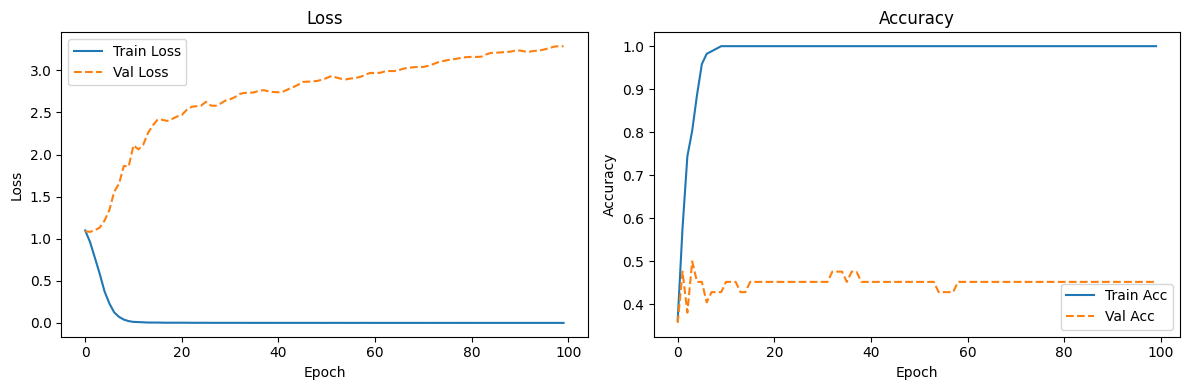

In [11]:
import matplotlib.pyplot as plt

# history 객체에는 학습 과정의 손실/정확도 정보가 저장됨
# 예: history = model.fit(...)

plt.figure(figsize=(12, 4))

# 1) Loss 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss', linestyle='--')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2) Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc', linestyle='--')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [13]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5189 - loss: 2.4892


[2.433744192123413, 0.5222222208976746]